
<a href="https://colab.research.google.com/github/kokchun/Maskininlarning-AI21/blob/main/Exercises/E02_sklearn.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Scikit-learn exercises 

---
These are introductory exercises in Machine learning with focus in **scikit-learn** .

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. EDA (*)

In the whole exercise, we will work with the "mpg" dataset from seaborn dataset. Start by loading dataset "mpg" from the ```load_dataset``` method in seaborn module. The goal will be to use linear regression to predict mpg - miles per gallon. 

&nbsp; a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.

&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. 

&nbsp; c) Make some plots on some of the columns that you find interesting.

&nbsp; d) Check if there are any columns you might want to drop. 

<details>

<summary>Answer</summary>

a) I have chosen to drop the rows, but it doesn't neccessary have to be the best method. Maybe some NaNs should be filled somehow?

b)
|      |      mpg |   cylinders |   displacement |   horsepower |   weight |   acceleration |
|:-----|---------:|------------:|---------------:|-------------:|---------:|---------------:|
| mean | 23.4459  |     5.47194 |        194.412 |     104.469  | 2977.58  |       15.5413  |
| std  |  7.80501 |     1.70578 |        104.644 |      38.4912 |  849.403 |        2.75886 |
| min  |  9       |     3       |         68     |      46      | 1613     |        8       |
| 25%  | 17       |     4       |        105     |      75      | 2225.25  |       13.775   |
| 50%  | 22.75    |     4       |        151     |      93.5    | 2803.5   |       15.5     |
| 75%  | 29       |     8       |        275.75  |     126      | 3614.75  |       17.025   |
| max  | 46.6     |     8       |        455     |     230      | 5140     |       24.8     |


c) Here are some example plots

<img src="../assets/EDA_mpg.png" height="400"/>

d) I have chosen to drop the columns origin and name. Think yourself if it is reasonable and feel free to experiment. Also there might be some domain experts in our class, that you can ask. 

</details>

---

  a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mpg_copy = sns.load_dataset('mpg')

In [2]:
mpg_copy.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
mpg_copy['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [4]:
mpg_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
mpg_copy.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
mpg_copy.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [7]:
mpg = mpg_copy.dropna()

In [8]:
mpg.isnull().sum().sum()

0

 b) Use describe only on those columns that are relevant to get statistical information from.

In [9]:
mpg = mpg.drop(['name'], axis=1)

In [10]:
mpg.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model_year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0


c) Make some plots on some of the columns that you find interesting.

In [11]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [12]:
mpg.columns[1:]

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin'],
      dtype='object')

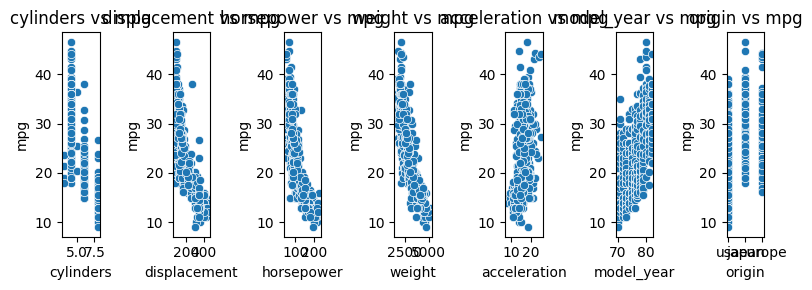

In [13]:
number_features = mpg.shape[1]-1
fig, axes = plt.subplots(1, number_features, figsize=(8,3), dpi=100 )

for i, feature in enumerate(mpg.columns[1:]):
    sns.scatterplot(data=mpg, x=feature, y='mpg', ax=axes[i])
    axes[i].set(xlabel=feature, ylabel='mpg',title=f'{feature} vs mpg')

fig.tight_layout()

Text(0.5, 1.03, 'Plot on features')

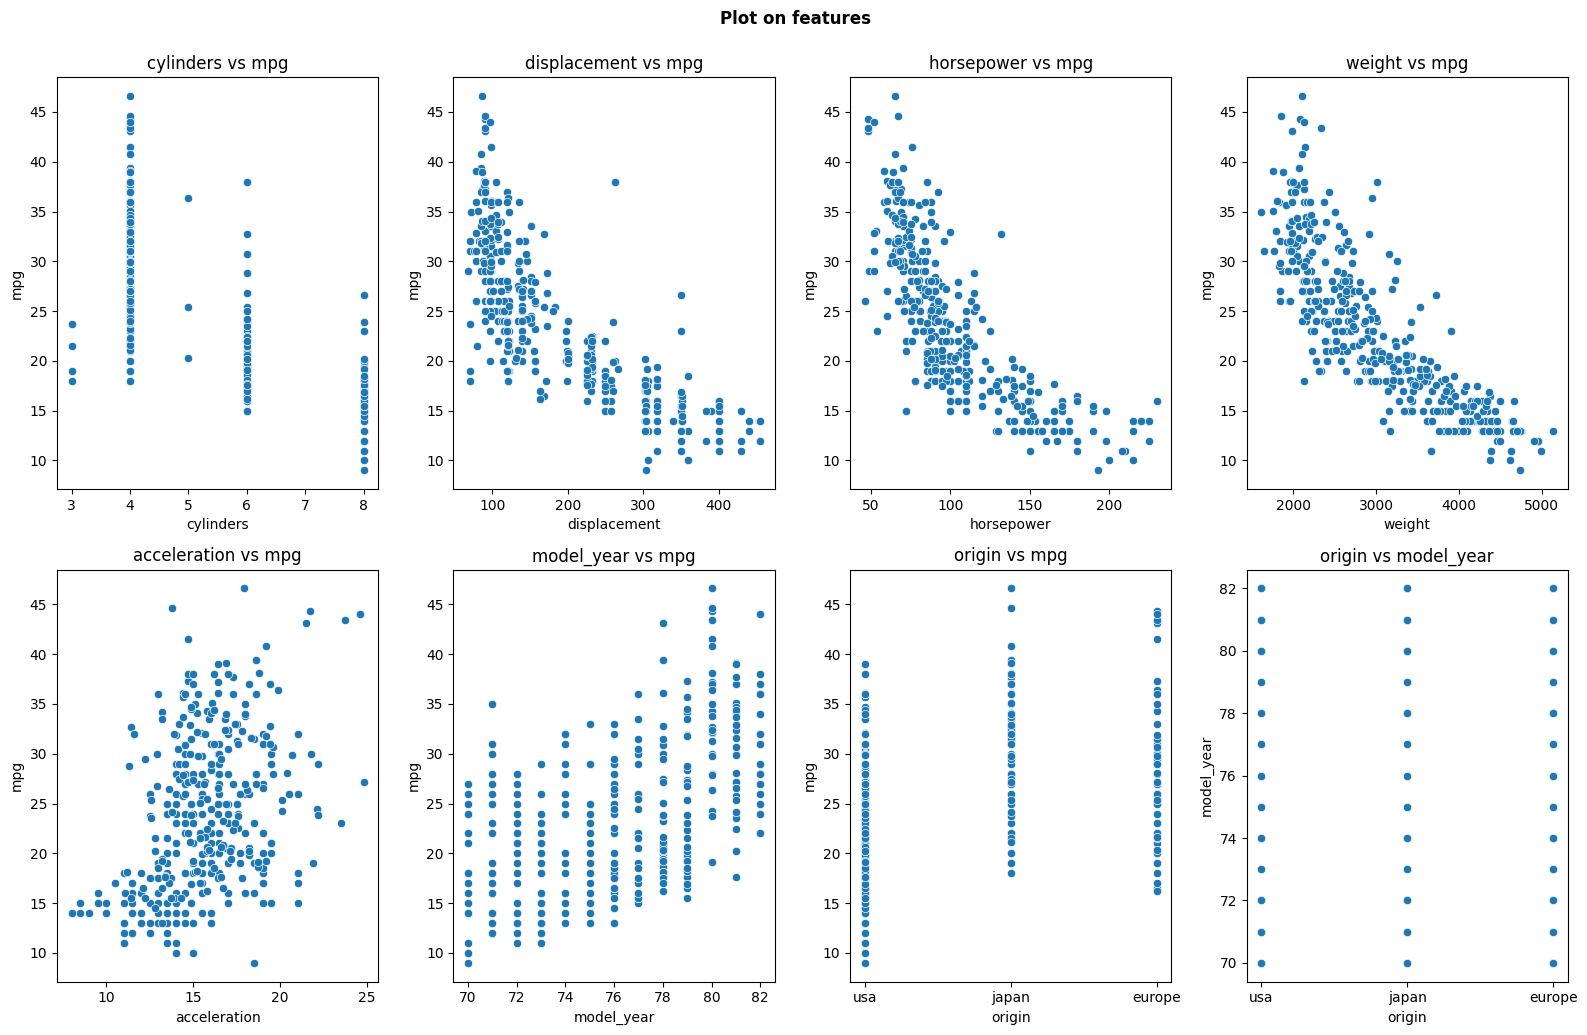

In [14]:
fig, axes = plt.subplots(2,4, figsize=(16,10), dpi=100 )

for ax, feature in zip(axes.flatten(), mpg.columns[1:]):
    sns.scatterplot(data=mpg, x=feature, y='mpg', ax=ax)
    ax.set(xlabel=feature,ylabel='mpg', title=f'{feature} vs mpg')

sns.scatterplot(data=mpg, x='origin', y='model_year', ax=axes[1,3])
axes[1,3].set(xlabel='origin',ylabel='model_year', title='origin vs model_year')

fig.tight_layout()
fig.suptitle('Plot on features', y=1.03, fontweight='bold')

In [15]:
mpg = mpg.drop(['origin'], axis=1)

## 1. Train|test split (*)

We want to predict the "mpg", split up X and y, and perform train|test split using scikit-learn. Choose test_size of 0.2 and random_state 42. Control the shapes of each X_train, X_test, y_train, y_test.  

<details>

<summary>Answer</summary>

Do a manual calculation to check against the shapes after train|test split. 

</details>

---

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mpg.drop('mpg', axis=1), mpg['mpg'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((313, 6), (79, 6), (313,), (79,))

## 2. Function for evaluation (*)

Create a function for training a regression model, predicting and computing the metrics MAE, MSE, RMSE. It should take in parameters of X_train, X_test, y_train, y_test, model. Now create a linear regression model using scikit-learns ```LinearRegression()``` (OLS normal equation with SVD) and call your function to get metrics. 

<details>

<summary>Answer</summary>

MAE 2.50

MSE 10.50

RMSE 3.24

</details>

In [17]:
from sklearn.linear_model import LinearRegression

model_SVD = LinearRegression()
model_SVD.fit(X_train, y_train)
print(f'Parameters: {model_SVD.coef_}')
print(f'Intercept: {model_SVD.intercept_}')

Parameters: [-0.116173    0.00101347 -0.00227634 -0.00656101  0.06173551  0.76063644]
Intercept: -15.057758585282404


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# first predict on our test data of X
y_pred_SVD = model_SVD.predict(X_test)

# calculate mae, mse
mae_SVD = mean_absolute_error (y_test, y_pred_SVD).round(5)
mse_SVD = mean_squared_error (y_test, y_pred_SVD).round(5)
rmse_SVD = np.sqrt(mse_SVD).round(5)

print (f'SVD, MAE: {mae_SVD:.2f}, SVD, MSE: {mse_SVD:.2f}, SVD, RMSE: {rmse_SVD:.2f}')

SVD, MAE: 2.50, SVD, MSE: 10.50, SVD, RMSE: 3.24


---
## 3. Compare models (*)

Create the following models 
- Linear regression (SVD)
- Linear regression (SVD) with scaled data (feature standardization)
- Stochastic gradient descent with scaled data (feature standardization)
- Polynomial linear regression with degree 1
- Polynomial linear regression with degree 2
- Polynomial linear regression with degree 3

Make a DataFrame with evaluation metrics and model. Which model performed overall best?

<details>

<summary>Answer</summary>

|      |   Linear regr. SVD |   Linear regr. SVD scaled |   Linear regr. SGD |   Polynom. regr. deg 1 |   Polynom. regr. deg 2 |   Polynom. regr. deg 3 |
|:-----|-------------------:|--------------------------:|-------------------:|-----------------------:|-----------------------:|-----------------------:|
| mae  |            2.50386 |                   2.50386 |            2.53515 |                2.50386 |                1.98048 |                2.11788 |
| mse  |           10.5024  |                  10.5024  |           10.8908  |               10.5024  |                7.41986 |                9.27353 |
| rmse |            3.24074 |                   3.24074 |            3.30012 |                3.24074 |                2.72394 |                3.04525 |

</details>

---

In [19]:
# Linear regression (SVD) with scaled data

from sklearn.preprocessing import MinMaxScaler
# instantiate an object from the calss MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

print(f"{scaled_X_train.min():.2f} ≤ scaled_X_train ≤ {scaled_X_train.max():.2f}")
print(f"{scaled_X_test.min():.2f} ≤ scaled_X_test ≤ {scaled_X_test.max():.2f}") # natural that it isn't [0,1] since we fit to training data 


0.00 ≤ scaled_X_train ≤ 1.00
-0.01 ≤ scaled_X_test ≤ 1.00


In [20]:
model_SVD_scaled = LinearRegression()
model_SVD_scaled.fit(scaled_X_train, y_train)
y_pred_SVD_scaled = model_SVD_scaled.predict(scaled_X_test)
print(f'Parameters: {model_SVD.coef_}')
print(f'Intercept: {model_SVD.intercept_}')


mae_SVD_scaled = mean_absolute_error(y_test, y_pred_SVD_scaled).round(5)
mse_SVD_scaled = mean_squared_error(y_test, y_pred_SVD_scaled).round(5)
rmse_SVD_scaled = np.sqrt(mse_SVD_scaled).round(5)

mae_SVD_scaled, mse_SVD_scaled, rmse_SVD_scaled


Parameters: [-0.116173    0.00101347 -0.00227634 -0.00656101  0.06173551  0.76063644]
Intercept: -15.057758585282404


(2.50386, 10.50237, 3.24074)

In [21]:
# Stochastic gradient descent
from sklearn.linear_model import SGDRegressor
model_SGD = SGDRegressor(loss = 'squared_error', learning_rate = 'invscaling', max_iter = 10000)
model_SGD.fit(scaled_X_train, y_train)
print(f"Parameters: {model_SGD.coef_}")
print(f"Intercept: {model_SGD.intercept_}")
y_pred_SGD = model_SGD.predict(scaled_X_test)

mae_SGD = mean_absolute_error(y_test, y_pred_SGD).round(5)
mse_SGD = mean_squared_error(y_test, y_pred_SGD).round(5)
rmse_SGD = np.sqrt(mse_SGD).round(5)

Parameters: [ -2.03020571  -5.0500898    0.08988262 -14.61421122   1.75253472
   9.00168573]
Intercept: [26.44394228]


### create dataframe from two series
phone_df = pd.DataFrame({'y':phone_y, 'x':phone_x})

In [22]:
# Create dataframe from dictionary of lists
import pandas as pd

data={'Name':['Karan','Rohit','Sahil','Aryan'],'Age':[23,22,21,24]}

df=pd.DataFrame(data)

df #print the dataframe

,Name,Age
0,Karan,23
1,Rohit,22
2,Sahil,21
3,Aryan,24


In [23]:
# Create dataframe from list of lists
import pandas as pd

data=[['Karan',23],['Rohit',22],['Sahil',21],['Aryan',24]]

df=pd.DataFrame(data,columns=['Name','Age'])

df

,Name,Age
0,Karan,23
1,Rohit,22
2,Sahil,21
3,Aryan,24


In [24]:
# Create customized index dataframe
import pandas as pd

data={'Name':['Karan','Rohit','Sahil','Aryan'],'Age':[23,22,21,24]}

df=pd.DataFrame(data,index=['No.1','No.2','No.3','No.4'])

df

,Name,Age
No.1,Karan,23
No.2,Rohit,22
No.3,Sahil,21
No.4,Aryan,24


In [25]:
df = pd.DataFrame({'Linear regr. SVD': [mae_SVD, mse_SVD, rmse_SVD], 'Linear regr. SVD scaled': [mae_SVD_scaled, mse_SVD_scaled, rmse_SVD_scaled] }, index = ['mae', 'mse', 'rmse'])
df

,Linear regr. SVD,Linear regr. SVD scaled
mae,2.50386,2.50386
mse,10.50237,10.50237
rmse,3.24074,3.24074


In [26]:
df = pd.DataFrame({'Linear regr. SVD': [mae_SVD, mse_SVD, rmse_SVD]}, index = ['mae', 'mse', 'rmse'])
df.insert(df.shape[1], 'Linear regr. SVD scaled', [mae_SVD_scaled, mse_SVD_scaled, rmse_SVD_scaled] )
df.insert(df.shape[1], 'Linear regr. SGD', [mae_SGD, mse_SGD, rmse_SGD]	)
df

,Linear regr. SVD,Linear regr. SVD scaled,Linear regr. SGD
mae,2.50386,2.50386,2.56741
mse,10.50237,10.50237,11.18457
rmse,3.24074,3.24074,3.34433


### Polynomial linear models
- Polynomial linear regression with degree 1
- Polynomial linear regression with degree 2
- Polynomial linear regression with degree 3

In [27]:
from sklearn.preprocessing import PolynomialFeatures

for deg in range(1,4):
    poly = PolynomialFeatures(degree = deg, include_bias=False)

    poly_features_train = poly.fit_transform(X_train)
    poly_regression = LinearRegression() 
    poly_regression.fit(poly_features_train, y_train) 

    poly_features_test = poly.fit_transform(X_test)
    y_pred_poly = poly_regression.predict(poly_features_test)

    mae_poly = mean_absolute_error(y_test, y_pred_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    rmse_poly = np.sqrt(mse_poly)
    rmse_poly

    df.insert(df.shape[1], f'Polynom. regr. deg {deg}', [mae_poly, mse_poly, rmse_poly])

df


,Linear regr. SVD,Linear regr. SVD scaled,Linear regr. SGD,Polynom. regr. deg 1,Polynom. regr. deg 2,Polynom. regr. deg 3
mae,2.50386,2.50386,2.56741,2.503860,1.980477,2.117877
mse,10.50237,10.50237,11.18457,10.502370,7.419858,9.273522
rmse,3.24074,3.24074,3.34433,3.240736,2.723942,3.045246



## 4. Further explorations (**)

Feel free to further explore the dataset, for example you could choose to 
- drop different columns
- find out feature importance in polynomial models
- fine tune further for a specific model by exploring hyperparameters (check documentation which type of parameters that can be changed)